<a href="https://colab.research.google.com/github/yoobyoungcheol/AIstudy24/blob/master/%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MBC 마켓에서 신상품으로 캔 와인을 판매하려고 한다.
주류는 온라인 판매가 안되서 온라인 예약 후에 오프라인매장에서 구매를 유도하려고함

입고된 와인을 보니 레드와인인지 화이트와인인지 구분표기가 안되었음

캔에 인쇠된 알콜도수, 당도, pH 값으로 와인 종류를 구별해보자
- 풀질 확인용으로 뜯은 캔이 테스트용으로 있고 이것을 데이터로 활용함
- 로지스틱 회귀 모델로 적용을 해서 알아보자

In [2]:
# 와인의 특성화된 데이터를 가져오자

import pandas as pd

wine = pd.read_csv("https://bit.ly/wine_csv_data")
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [3]:
# 알콜, 당도, 산도, 클래스(타깃 = 0(레드와인), 1(화이트와인))
# 데이터에서 화이트와인이 양성클래스로 화이트화인을 표시하는 문제
wine.info()
# 결과 6497개의 샘플 4개의 열(실수)
# Non-Null 누락된 값이 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
wine.describe()  # 열에 대한 통계
# mean=평균, std=표준편차, min=최소값
# 25%=1사분위수    50%=중간값(2분위수)      75%=3사분위    max=100% 4사분위
# 사분위수 : 데이터를 순서대로 4등분한 값

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [6]:
# 알콜 도수와 당도, pH값의 스케일이 다름
# StandardScaler : 클래스로 특성을 표준화 해야함

data = wine[['alcohol','sugar','pH']].to_numpy()
# 와인 데이터 프레임에서 처음 3개의 열을 넘파이 배열로 바꿔서 data에 저장

target = wine['class'].to_numpy()
# class 열을 넘파이 배열로 바꿔서 target(정답) 배열에 저장

print(data)

[[ 9.4   1.9   3.51]
 [ 9.8   2.6   3.2 ]
 [ 9.8   2.3   3.26]
 ...
 [ 9.4   1.2   2.99]
 [12.8   1.1   3.34]
 [11.8   0.8   3.26]]


In [7]:
print(target)

[0. 0. 0. ... 1. 1. 1.]


In [9]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data,target,test_size=0.2,random_state=42)
# train_test_split() 함수는 설정값을 지정하지 않으면 25%를 테스트세트로 지정한다
# test_size=0.2를 이용해서 20%정도만 테스트 세트로 지정


In [10]:
print(train_input.shape,test_input.shape)

(5197, 3) (1300, 3)


In [13]:
from sklearn.preprocessing import StandardScaler
# 훈련세트 전처리         (표준점수로 반환해서 모든 단위를 맞추어준다)
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
print(train_scaled)
print("=============================================")
print(test_scaled)

[[ 0.01376574  0.4646116  -0.16888369]
 [ 1.60871671 -0.70299854  0.26967864]
 [ 1.10504798 -0.70299854  1.20945505]
 ...
 [-0.82568214  0.0267578   0.14437512]
 [-0.82568214  0.52716215 -0.23153545]
 [-0.82568214 -0.57789745  1.83597265]]
[[ 1.44082714  1.52797084  0.26967864]
 [-0.48990299 -0.68214836  0.3323304 ]
 [ 1.27293756  0.40206106 -0.23153545]
 ...
 [ 1.60871671 -0.76554908 -0.16888369]
 [-0.90962693  0.88161523  0.52028568]
 [-1.49724045  2.09092573 -1.98578474]]


In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()               # 로지스틱 회귀모델 객채만들기
lr.fit(train_scaled,train_target)       # 훈련

print(lr.score(train_scaled,train_target))          # 78.08%
print(lr.score(test_scaled,test_target))            # 77.76%
# 결론 80점 이하로 점수가 낮게 나옴 (과소 적합)

0.7808350971714451
0.7776923076923077


In [17]:
# 제출용 보고서를 만들어 보자
print(lr.coef_,lr.intercept_)      # 로지스틱회귀 (계수=가중치, 절편= 더해지는값)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


In [ ]:
# 알콜도수값이 0.51268071를 곱하고, 당도에 1.67335441을 곱하고, pH값에 -0.68775646을 곱한다음 모두 더한다
# 위에 나온 값에 절편 1.81773456를 더함
# 이값이 0보다 크면 화이트와인 낮으면 레드와인
# 현재 77%정도의 확률로 화이트와인과 레드와인을 구분할수있음

In [19]:
# 결정트리(이유를 설명하자)
# if문을 사용하는것과 유사하다
from sklearn.tree import DecisionTreeClassifier # (Decision:결정)

# DecisionTreeClassifier: 결정 트리 모델로 훈련
dt = DecisionTreeClassifier()
dt.fit(train_scaled,train_target)

print(dt.score(train_scaled,train_target))   # 99.69
print(dt.score(test_scaled,test_target))     # 85.15
# 과대적합

0.996921300750433
0.8515384615384616


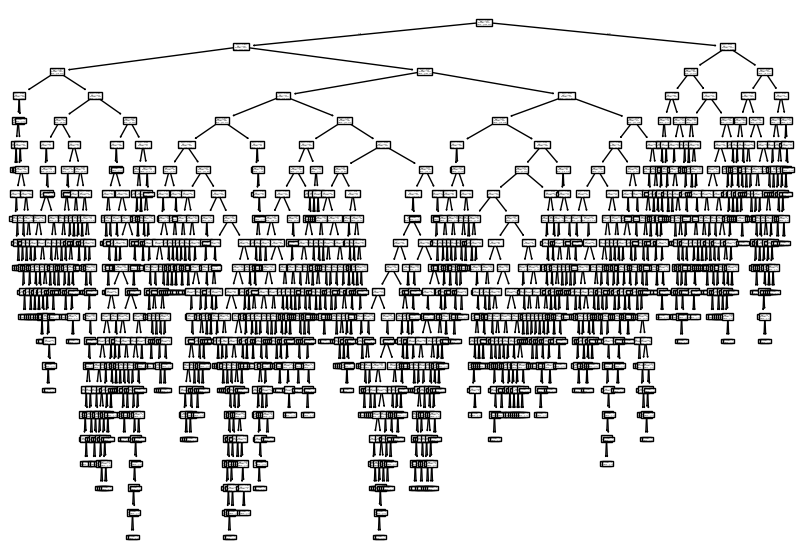

In [20]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
# figure=(20,15) 그래프의 사이즈 (가로인치 , 세로인치)
plot_tree(dt)
plt.show()
# 맨위 노드(루트노드), 맨아래노드(리프노드)

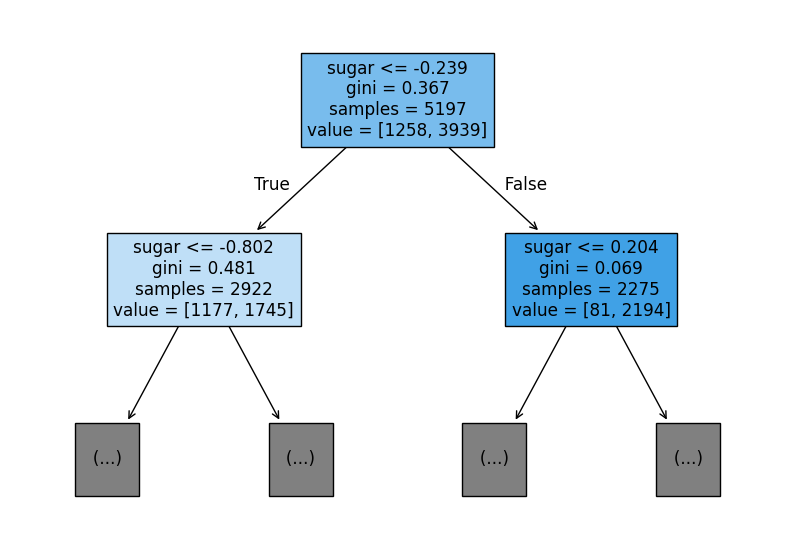

In [21]:
plt.figure(figsize=(10,7))
plot_tree(dt,max_depth=1,filled=True,feature_names=('alcohol','sugar','pH'))
# max_depth=1 루트노드를 제외
# filled=True 클래스에 맞게 색칠
# feature_names=['alcohol','sugar','pH']
plt.show()
# sugar가 -0.239 이상이면 false
# sugar가 -0.239 미만이면 true  # (윈쪽 가지로)
# 총샘플수는 5197개 음성클래스가(레드와인) 1258개 양성클래스(화이트와인) 3939개
    # 아래쪽 노드에 윈쪽 노드를 살펴보면
    # 이 노드는 당도가 너 낮은지를 물어보는 노드(-0.802)
    # 당도가 -0.802와 같거나 낮다면 다시 윈쪽으로
    #그렇지않으면 오른쪽으로 이동 음성클래스가 1,177개    양성클래스는 1,745개

    # 오른쪽 노드를 확인해보면 음성클래스가 81개 양성클래스가 2,194개
    # 대부분의 화이트 와인 샘플이 이 노드로 이동됨
# gini = 0.367 (불순도)
# samples = 5197 (총샘플수)
# value = 값 (1258(1),3939(0))

In [ ]:
# 노드의 바탕색을 유심히 보면 오른쪽노드는 루트노드보다 더 진하고 윈쪽노드는 연하다
# filled=True로 설정해 놓아서 클래스마다 색깔을 지정한다 비율에 따라 색이 옅고 짙음을 표시한다

# 결정트리에서 예측하는 방법은 간단한데, 리프노드에서 가장많은 클래스가 예측 클래스가 됨
# 만약 이 결정트리로 성장을 멈춘다면 윈쪽노드에 도달한 샘플과 오른쪽 노드에 도달한 샘플은 모두 양성클래스로 예측된다. (양성 클래스가 많아서)

In [ ]:
# gini(불순도) : 노드에서 데이터를 분할하는 기준을 정하는 값

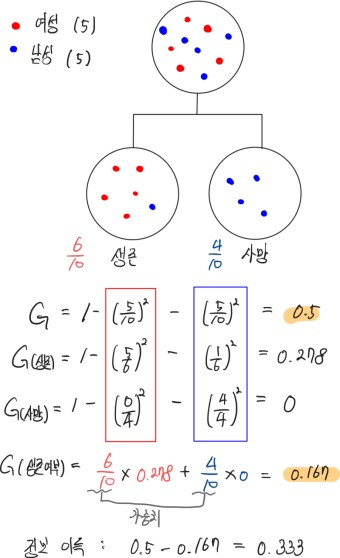

In [22]:
# 가지치기 : 열매를 잘 맺기 위해서 가지치기를 하듯이 결정트리에서도 사용한다.
# 가지치기를 하지 않으면 무작정 끝까지 자라나는 트리를 만든다
# 트리의 깊이(depth)를 지정하면된다.

dt = DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_scaled,train_target)

print(dt.score(train_scaled,train_target))   #   84.54%          99.69 (max_depth지정안한것)
print(dt.score(test_scaled,test_target))     #   84.15%          85.15 (max_depth지정안한것)

0.8454877814123533
0.8415384615384616


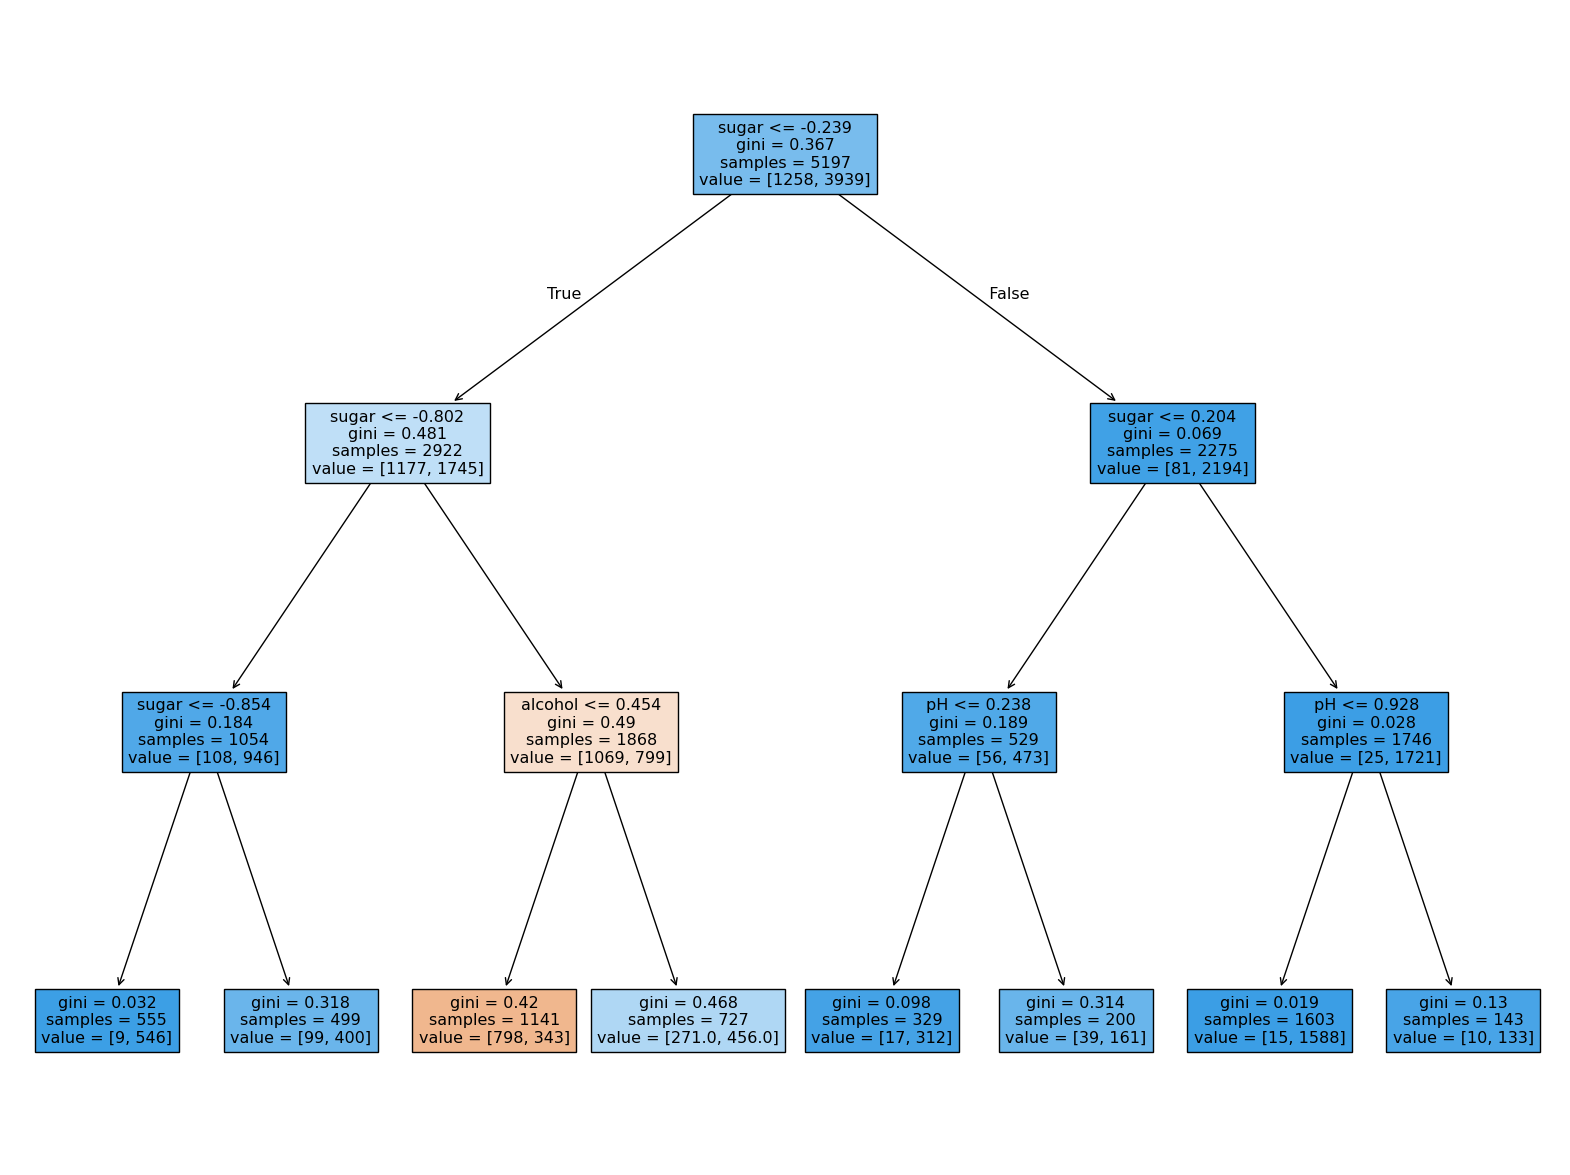

In [23]:
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True,feature_names=("alcohol","sugar",'pH'))
plt.show()

In [ ]:
# 그래프 분석
# 루프노드(depth=0) 다음 깊이에 있는 depth=1 노드는 모두 당도 하나만을 기준으로 훈련하게 훈련세트를 나눔
# 하지만 depth=2에서는 맨 윈쪽 노드만당도를 기ㅐ준으로 나누고 윈쪽에서 두번째 노드는 알콜도수를 기준ㄴ으로 나눔, 오른쪽 두노드는 pH를 사용합니다
# 깊이 3에 있는 노드가 최종 노드인 리프노드이다
# 윈쪽에서 세번쨰 있는 노드만 음성 클래스가 더 많다
# 이노드에 도착해야만 레드와인으로 예측함
# 결론 : 당도는 -0.239보다 작고 -0.802보다 커야함
#        알콜도수는 0.454보다 작으면 레드와인이다

In [ ]:
# -0.802라는 음수로된 당도를 상사에게 보고할수있나?
# 표준화 전처리를 하지않고 결정트리를 사용해보자(특성값에 스케일은 효과가 없다)

In [24]:
dt = DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_input,train_target)

print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))
# DecisionTreeClassifier 는 표준점수를 사용하지 않아도 되는 경우도 있다.

0.8454877814123533
0.8415384615384616


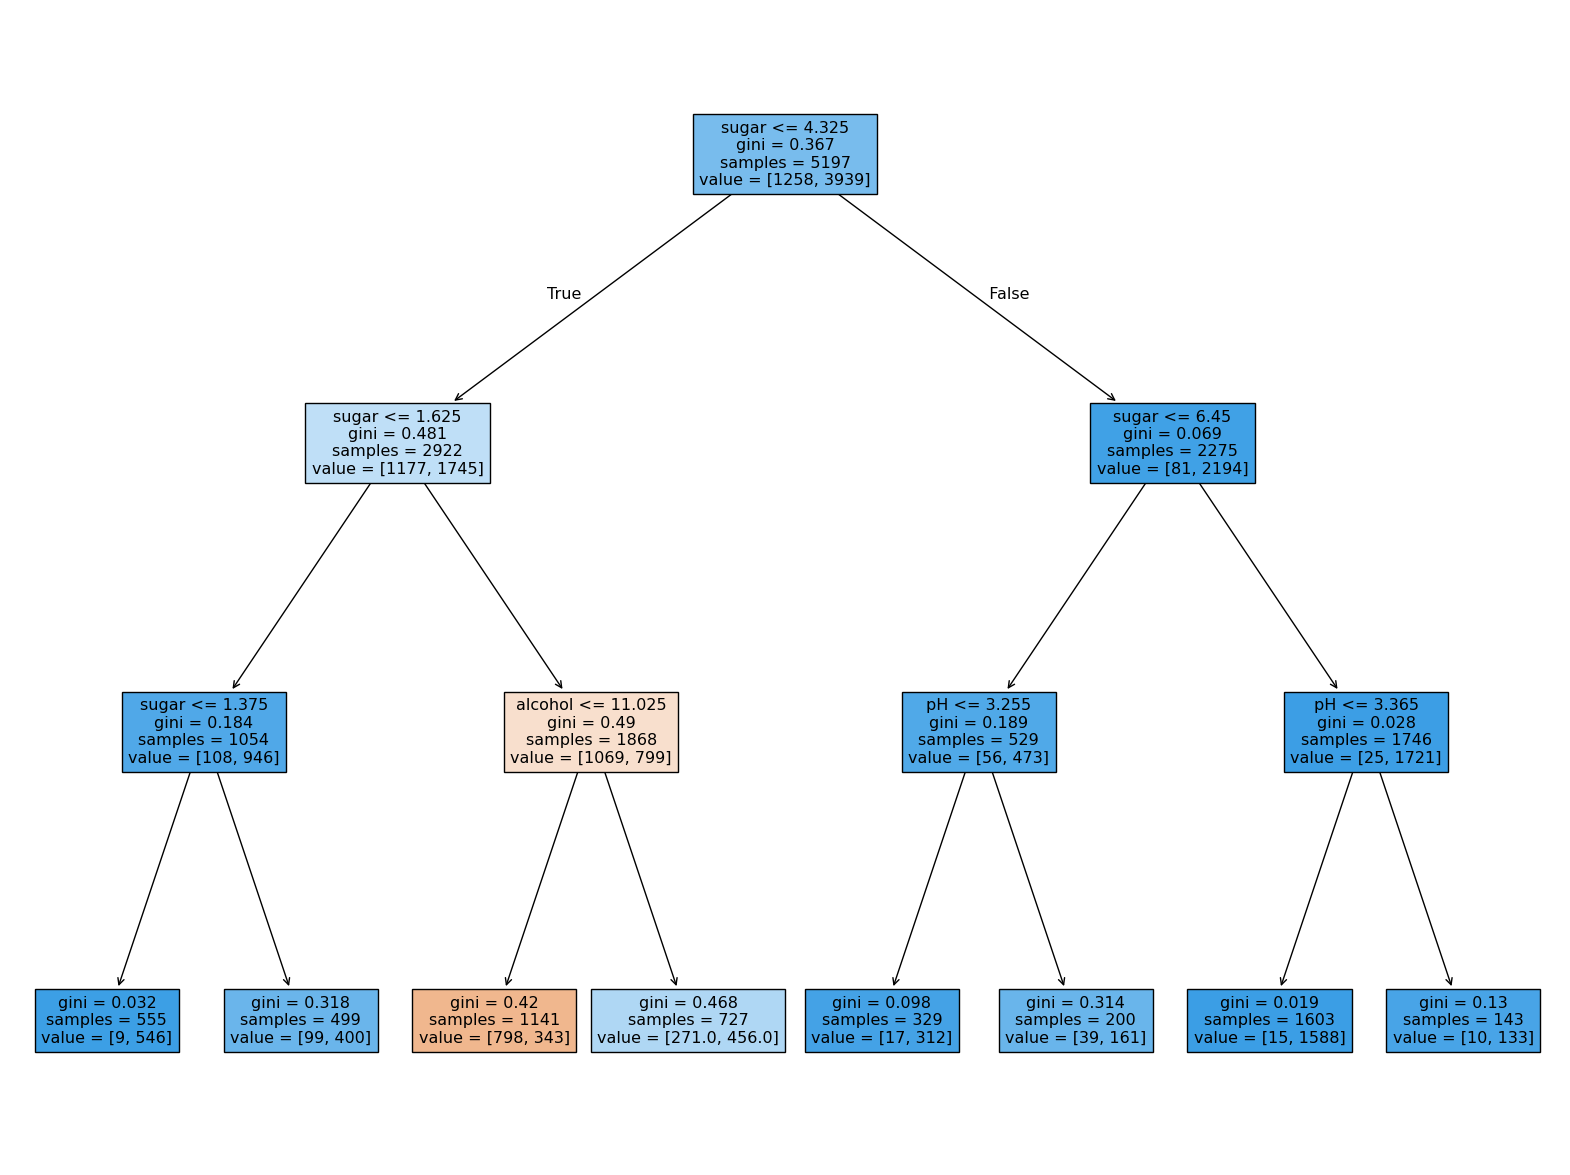

In [25]:
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True,feature_names=("alcohol","sugar",'pH'))
plt.show()

In [ ]:
# 결론 : 당도는 4.325보다 작고 1.625보다 커야함
#        알콜도수는 11.025보다 작으면 레드와인이다

In [26]:
# 결정트리는 어떤 특성이 가장 유용했는지 나타내는 특성 중요도를 계산해줌
print(dt.feature_importances_)
# [0.12345626 0.86862934 0.0079144 ] 이 세가지를 다 더하면 1이 나와야함
#   알콜도수     당도        PH         -> 입력값 순으로 리턴

[0.12345626 0.86862934 0.0079144 ]


In [27]:
# 좌우가 균일하지 않은 트리
# min_impurity_decrease=0.0005 는 불순도가 0.0005를 넘을때만 분할하라는 의미이다.
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005,random_state=42)
dt.fit(train_input,train_target)

print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))

0.8874350586877044
0.8615384615384616


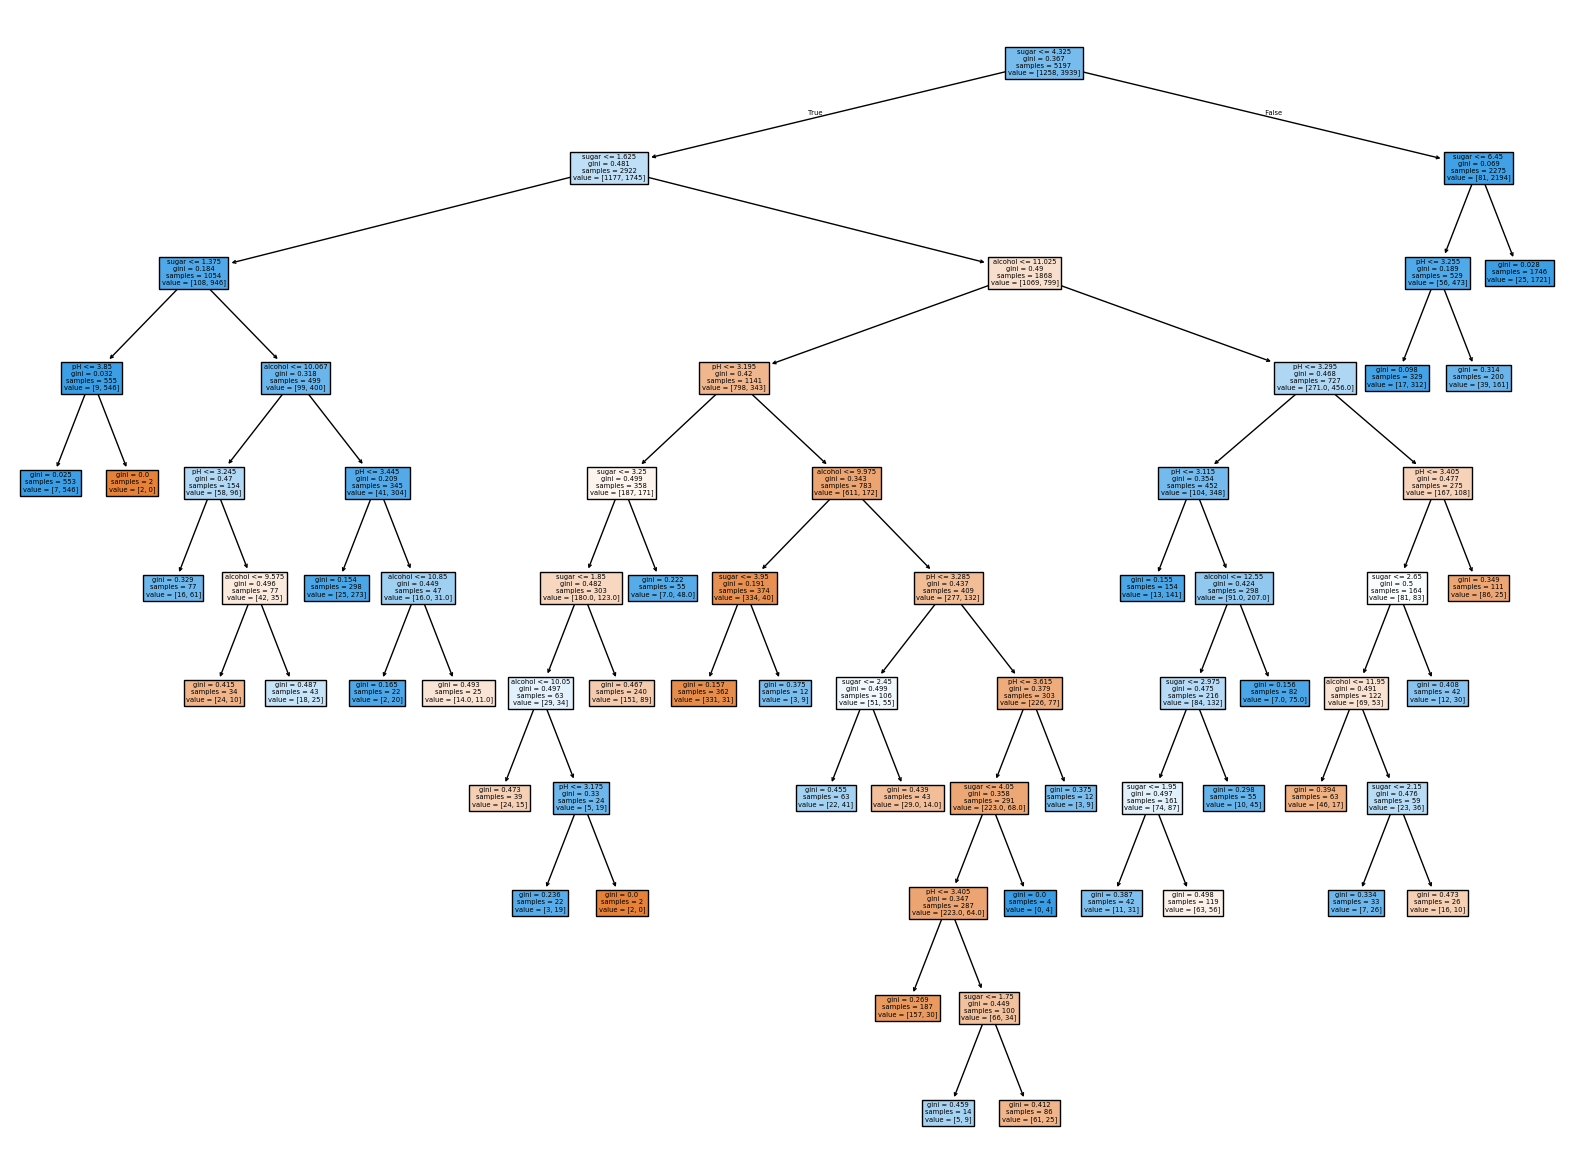

In [28]:
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True,feature_names=("alcohol","sugar",'pH'))
plt.show()